# **Funciones Utiles**

In [ ]:
from pathlib import Path
from typing import List
import pandas as pd
import numpy as np

class Base:

  rename_columns = {"rmag":"r",
                    "imag":"i",
                    "gmag":"g",
                    "umag":"u",
                    "Hamag":"Ha",
                    "Hmag":"H",
                    "Jmag":"J",
                    "Kmag":"K",
                    "W1mag":"W1",
                    "W2mag":"W2"
                    }

  @classmethod
  def preprocess(cls, df:pd.DataFrame,filename,x_columns:List[str],y_columns:List[str],dropna_x:bool=True,dropna_y:bool=False,verbose=False,dtypes={},fill_values=None,):
      if not fill_values is None:
          for column,value in fill_values.items():
              if verbose:
                  print(f"Warning: Filling missing values for {column} with {value}")
              df[column] = df[column].fillna(value)
      df = df.rename(columns=cls.rename_columns)
      y = df[y_columns].copy()
      x = df[x_columns].copy()

      metadata_columns = list(set(df.columns).difference(set(x_columns).union(set(y_columns))))
      metadata = df[metadata_columns].copy()

      if dropna_x or dropna_y:
          n = len(x)
          nan_indices = np.zeros(0)
          if dropna_x:
              nan_indices_x = np.where(pd.isnull(x).any(axis=1))
              nan_indices = np.union1d(nan_indices,nan_indices_x)
          if dropna_y:
              nan_indices_y = np.where(pd.isnull(y).any(axis=1))
              nan_indices = np.union1d(nan_indices,nan_indices_y)

          x.drop(nan_indices,inplace=True)
          y.drop(nan_indices,inplace=True)
          metadata.drop(nan_indices,inplace=True)

          new_n=len(x)

          if new_n<n and verbose:
              print(f"Warning loading data from {filename}:")
              print(f"Dropped {n-new_n} rows with missing values. ")
              print(f"Rows (original):   {n}")
              print(f"Rows (after drop): {new_n}")
          x=x.reset_index(drop=True)
          y=y.reset_index(drop=True)
          metadata=metadata.reset_index(drop=True)
      return x,y,metadata

  @classmethod
  def load(cls, filename:str,x_columns:List[str],y_columns:List[str],dropna:bool,verbose=False,dtypes={},fill_values=None):
      # folderpath =Path(__file__).parent.absolute() # Alternar en google Colab
      folderpath =Path("/content/Hou2016_VPHAS-SDSS-IPHAS-2MASS.csv").parent.absolute() # Alternar en google Colab
      filepath = folderpath / filename
      df = pd.read_csv(filepath,dtype=dtypes)
      return cls.preprocess(df,filename,x_columns,y_columns,dropna,verbose=verbose,dtypes=dtypes,fill_values=fill_values)

# **Carga de datos**

In [ ]:
!cd /content/
!pwd

/content


In [ ]:

default_filename = "Hou2016_VPHAS-SDSS-IPHAS-2MASS.csv"

twomass_x_columns = [ 'u', 'g', 'r',
                      'i', 'Ha', 'J', 'H', 'K']
allwise_x_columns = twomass_x_columns + ["W1","W2"]

def load(filename=default_filename,dropna=True,verbose=False):
    y_columns = ["objtype_Hou"]
    return Base.load(filename,twomass_x_columns,y_columns,dropna=dropna,verbose=verbose)

In [ ]:
filename = "Hou2016_VPHAS-SDSS-IPHAS-2MASS.csv"

#load(filename=filename)
path = Path(f"/content/{filename}")
str_cols = ['ID', 'SpT', 'Type', 'EM', 'Be', 'obsid', 'objtype', 'class', 'subclass',
            'B-TS1', 'B-TS2', 'B-TS', 'EM1', 'GroupID', 'GroupSize']
str_cols2 = ["EM1",  "EMobj",  "BeC1",  "EM2",  "Be_EM2",  "BeC2",  "BeC"]
types = {k:str for k in str_cols+str_cols2}
types["umag"]=float
df = pd.read_csv(path,dtype=types)
#fill_columns = {"EM":0,"Be":0}
#for column,value in fill_columns.items():
#       df[column] = df[column].fillna(value)
n,m = df.shape
print(f"Dataset has {n} samples and {m} features.")

#selected_columns = ['EM','umag','gmag','rmag', 'Hamag', 'imag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag']
selected_columns = ['umag','gmag','rmag', 'Hamag', 'imag', 'Jmag', 'Hmag', 'Kmag']
df_mag = df[selected_columns]
df_mag=df_mag.dropna()
n_mag = len(df_mag)
print(f"Dropped ({n-n_mag}) samples becasue they contained NaN values in their magnitudes")
print(df_mag)

Dataset has 1034 samples and 29 features.
Dropped (27) samples becasue they contained NaN values in their magnitudes
        umag    gmag   rmag  Hamag   imag    Jmag    Hmag    Kmag
0     14.680  14.280  13.47  13.33  12.99  12.347  12.072  12.003
14    14.390  14.000  13.43  13.30  13.09  12.506  12.360  12.208
15    14.210  14.260  13.62  13.40  13.26  12.703  12.469  12.387
16    14.870  14.680  13.87  13.72  13.37  12.553  12.337  12.147
17    14.870  14.680  13.87  13.72  13.37  12.553  12.337  12.147
...      ...     ...    ...    ...    ...     ...     ...     ...
1029  19.074  17.439  16.99  16.86  16.64  15.860  15.641  15.328
1030  19.103  17.698  17.17  17.04  16.70  15.992  15.930  15.377
1031  15.246  14.369  13.90  13.67  13.47  12.784  12.554  12.399
1032  17.083  15.953  15.29  14.87  14.83  14.134  13.759  13.527
1033  18.279  16.709  16.27  16.15  15.86  15.284  15.032  15.162

[1007 rows x 8 columns]


# **Visualización**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

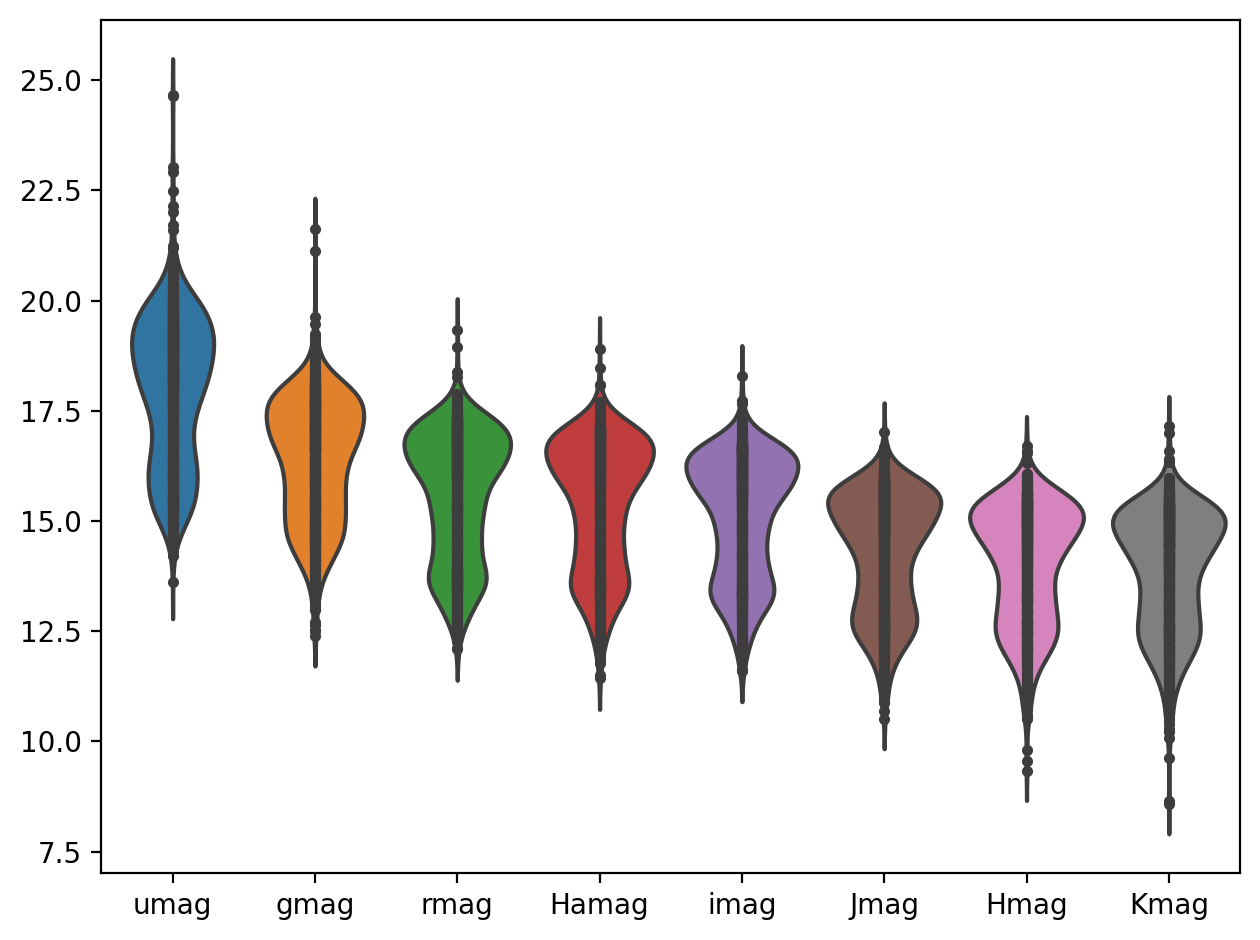

In [ ]:
# Definicion de funcion para diagrama de Violin
def violin_plot(data):
  return None

plt.figure(dpi=200)
sns.violinplot(data=df_mag, inner="points")
plt.tight_layout()
#plt.savefig("/content/violin.png")
plt.show()